In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost

In [2]:
import sys
!{sys.executable} -m pip install xgboost

In [3]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/ohikendoit/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

In [4]:
#사용자 운영체제 확인
import os
os.name

#운영체제별 한글 폰트 설정 - SNS한글폰트깨짐 방지
if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False)

#글씨 선명하게 출력하도록 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

In [6]:
matplotlib.get_cachedir()

'/Users/ohikendoit/.matplotlib'

### EDA

In [7]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [8]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [9]:
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


In [10]:
train.corr()
#중식계, 석식계가 상관관계가 있다고 판단 - 상관관계가 있다고 인과관계가 될 수 는 없지만,
#점심에도 먹은사람이 저녁에도 먹을 가능성이 크다고 판단됨
#음식이 너무 맛이없지않는한 왠만하면 구내식당을 이용할거라 예측

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


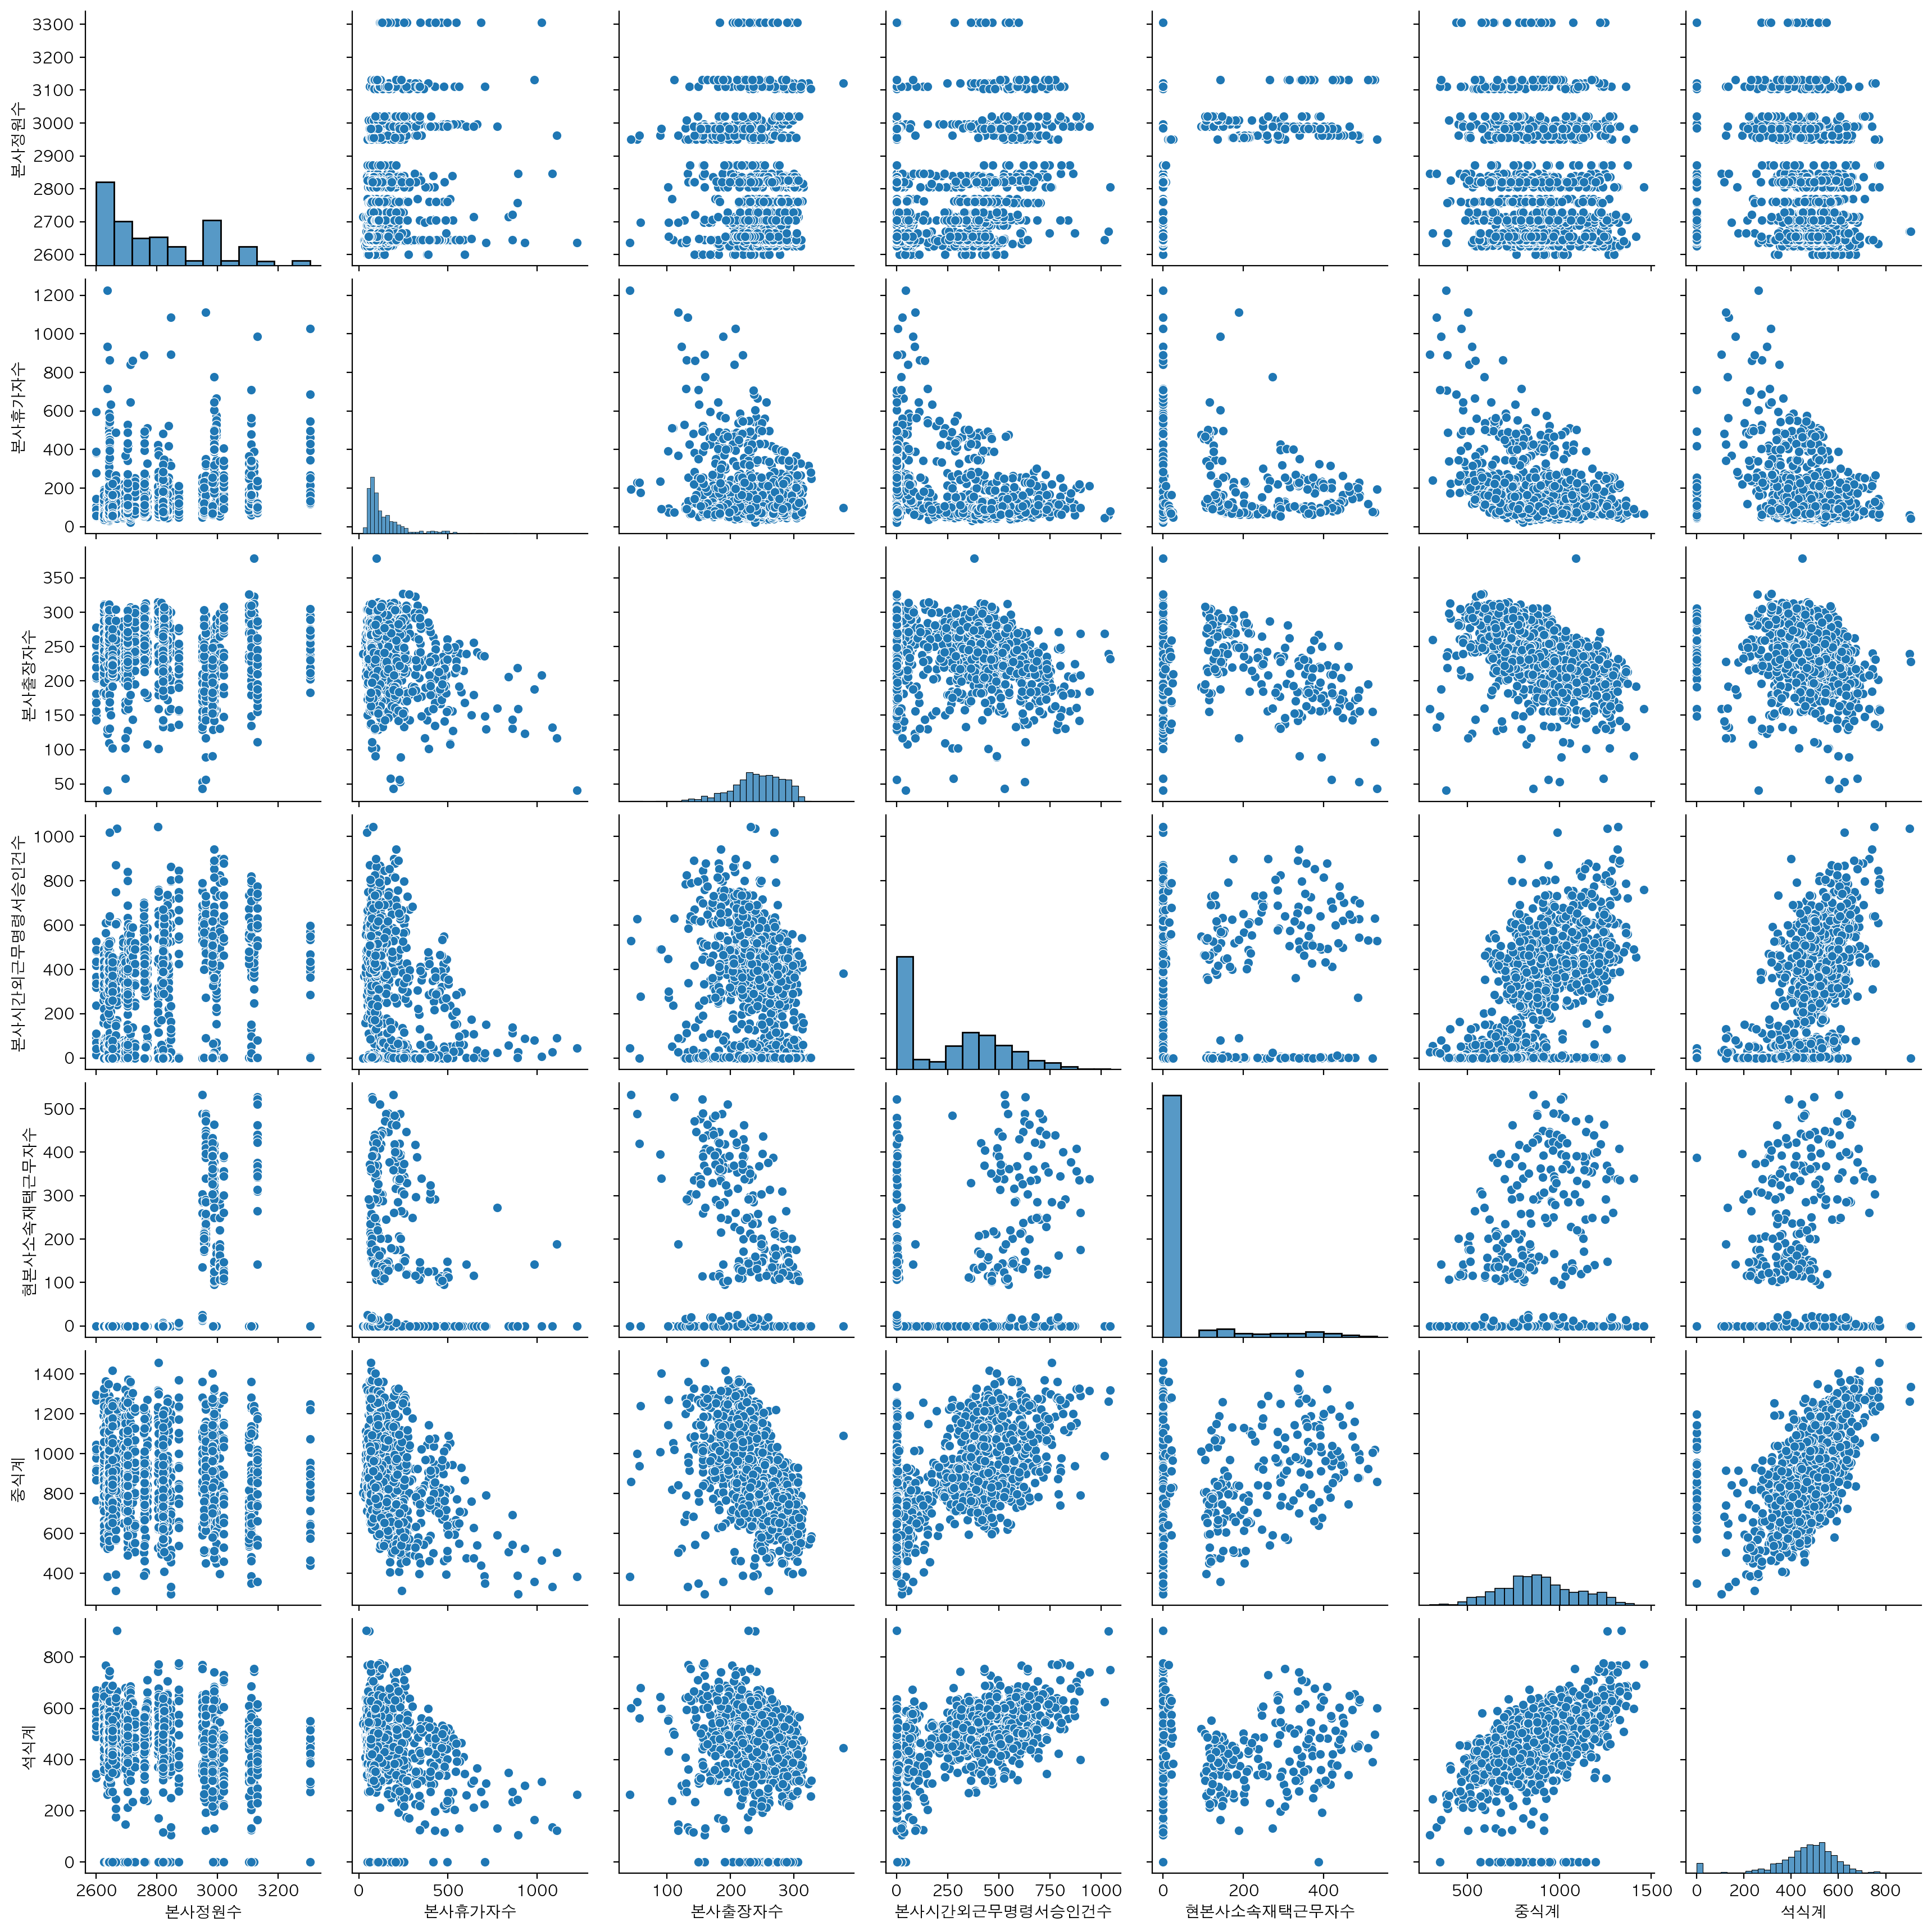

In [11]:
sns.pairplot(train)

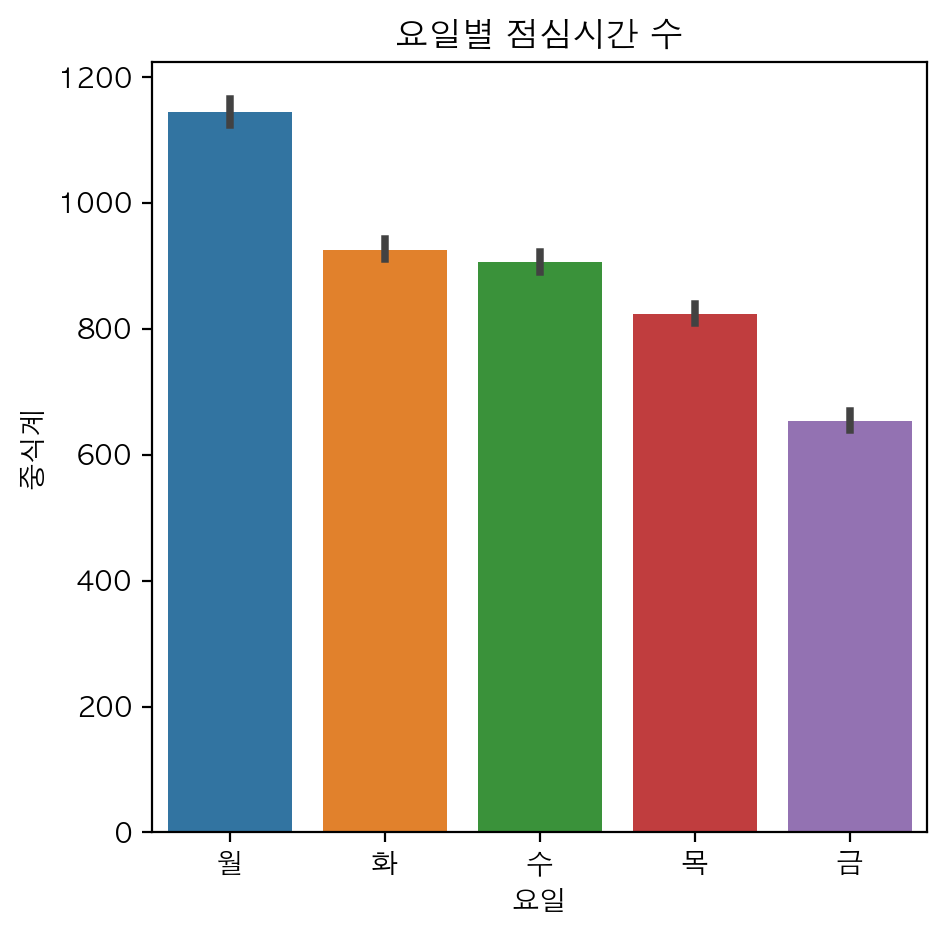

In [12]:
plt.figure(figsize=(5, 5))

sns.barplot(x="요일", y="중식계", data=train)
plt.title("요일별 점심시간 수")
plt.show()

#월요일이 가장 많고 금요일로 갈수록 줄어드는 추이

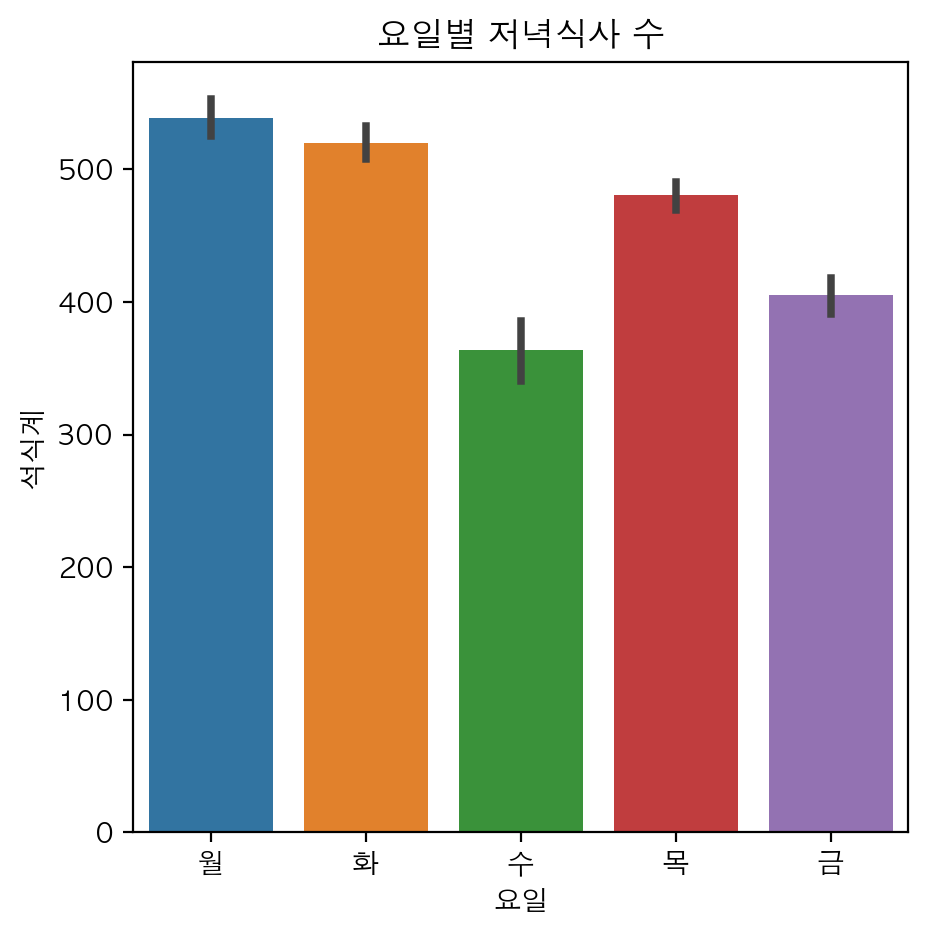

In [13]:
plt.figure(figsize=(5, 5))

sns.barplot(x="요일", y="석식계", data=train)
plt.title("요일별 저녁식사 수")
plt.show()

<AxesSubplot:xlabel='중식계', ylabel='Density'>

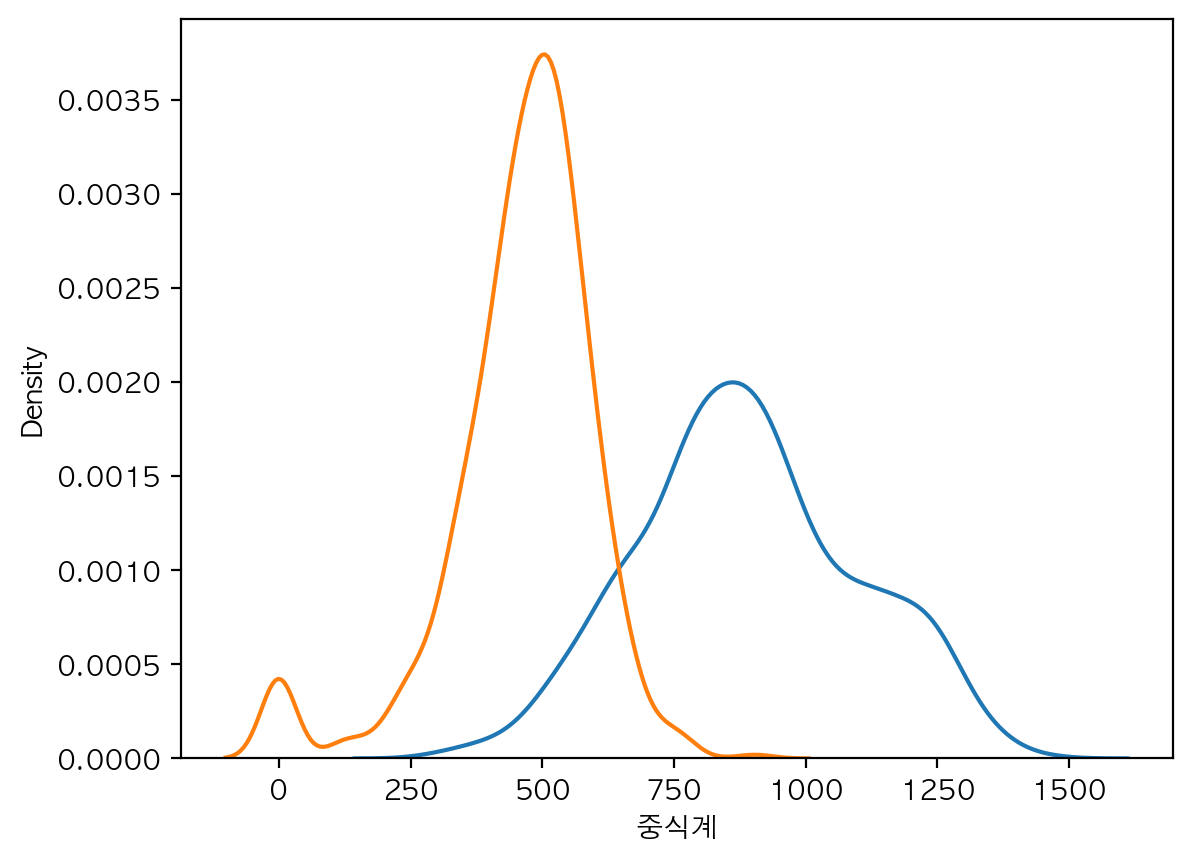

In [14]:
x=train['중식계']
x2=train['석식계']
sns.kdeplot(x) #커널밀도추정; Kernel Density Estimator 데이터 분포 확인
sns.kdeplot(x2)

### Data Manipulation

In [15]:
train.columns = ['date', 'day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'break', 'lunch', 'dinner', 'lunch_t', 'dinner_t']
train.head(1)

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [16]:
#날짜 정리
train['date'] = pd.to_datetime(train['date'])
train['yearmonth'] = train['date'].dt.strftime('%Y%m')

In [17]:
train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].dt.strftime('%m%d')

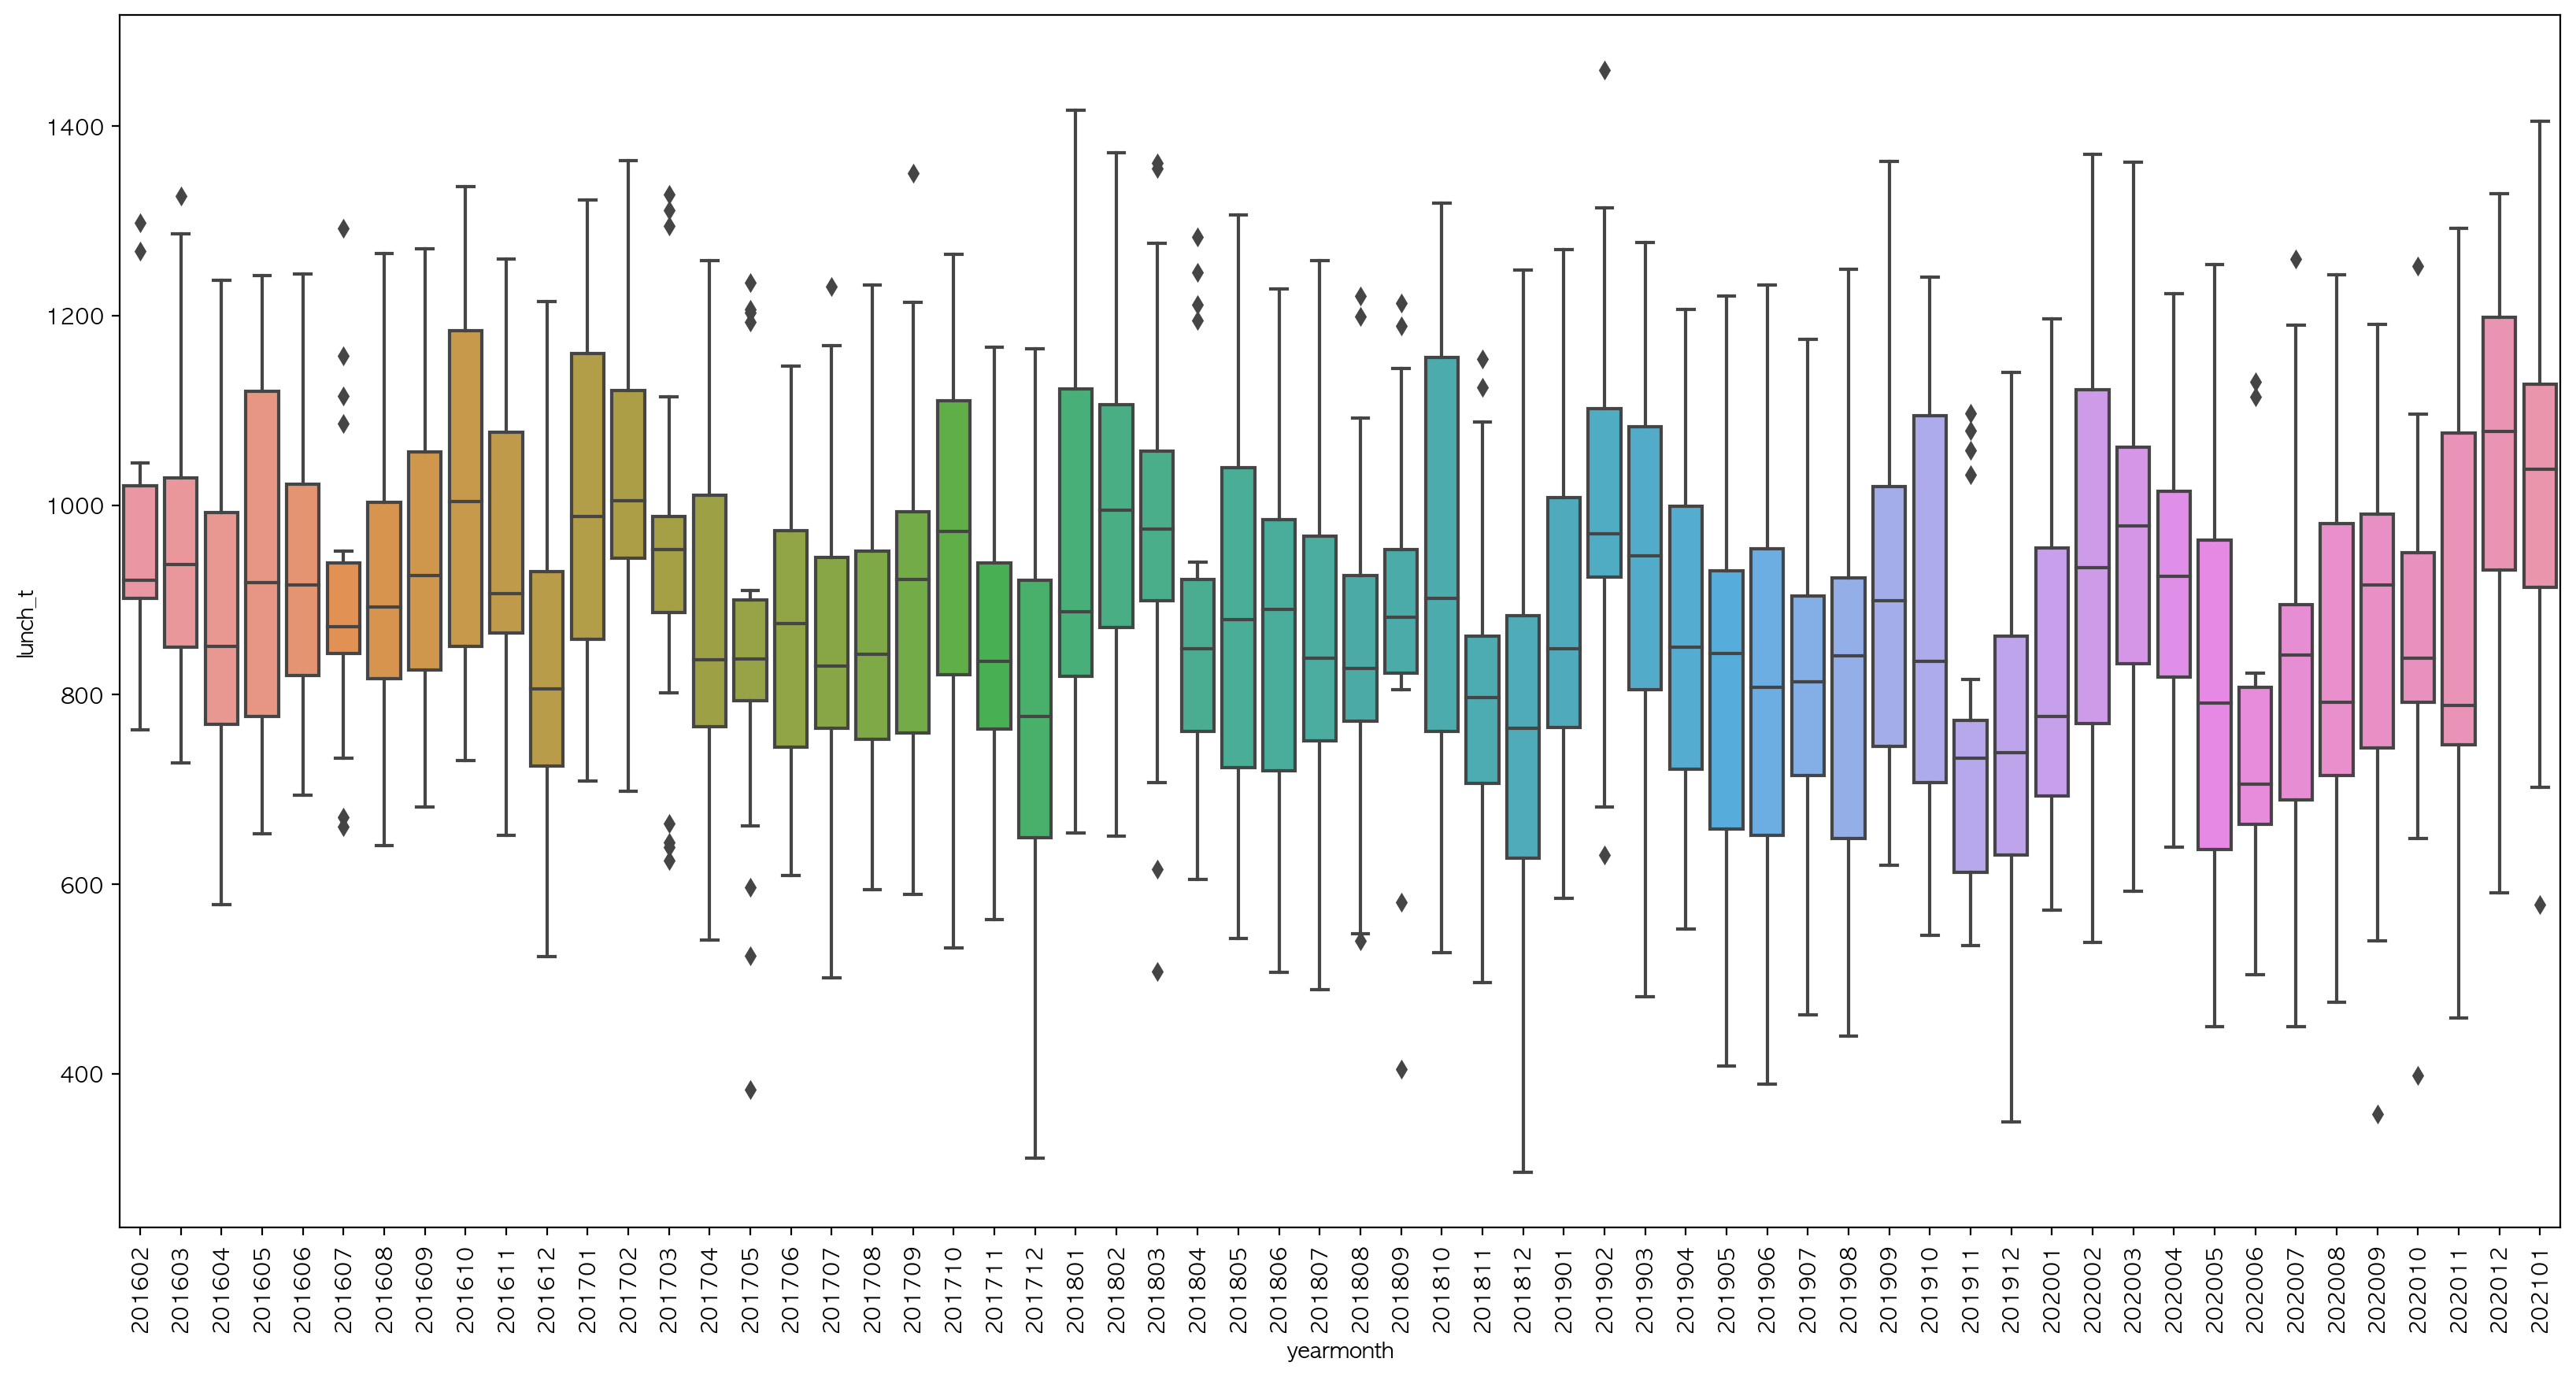

In [18]:
#월별 점심 식수인원
plt.figure(figsize=(20, 10))
rot=sns.boxplot(x='yearmonth', y='lunch_t', data=train)

for item in rot.get_xticklabels():
    item.set_rotation(90)

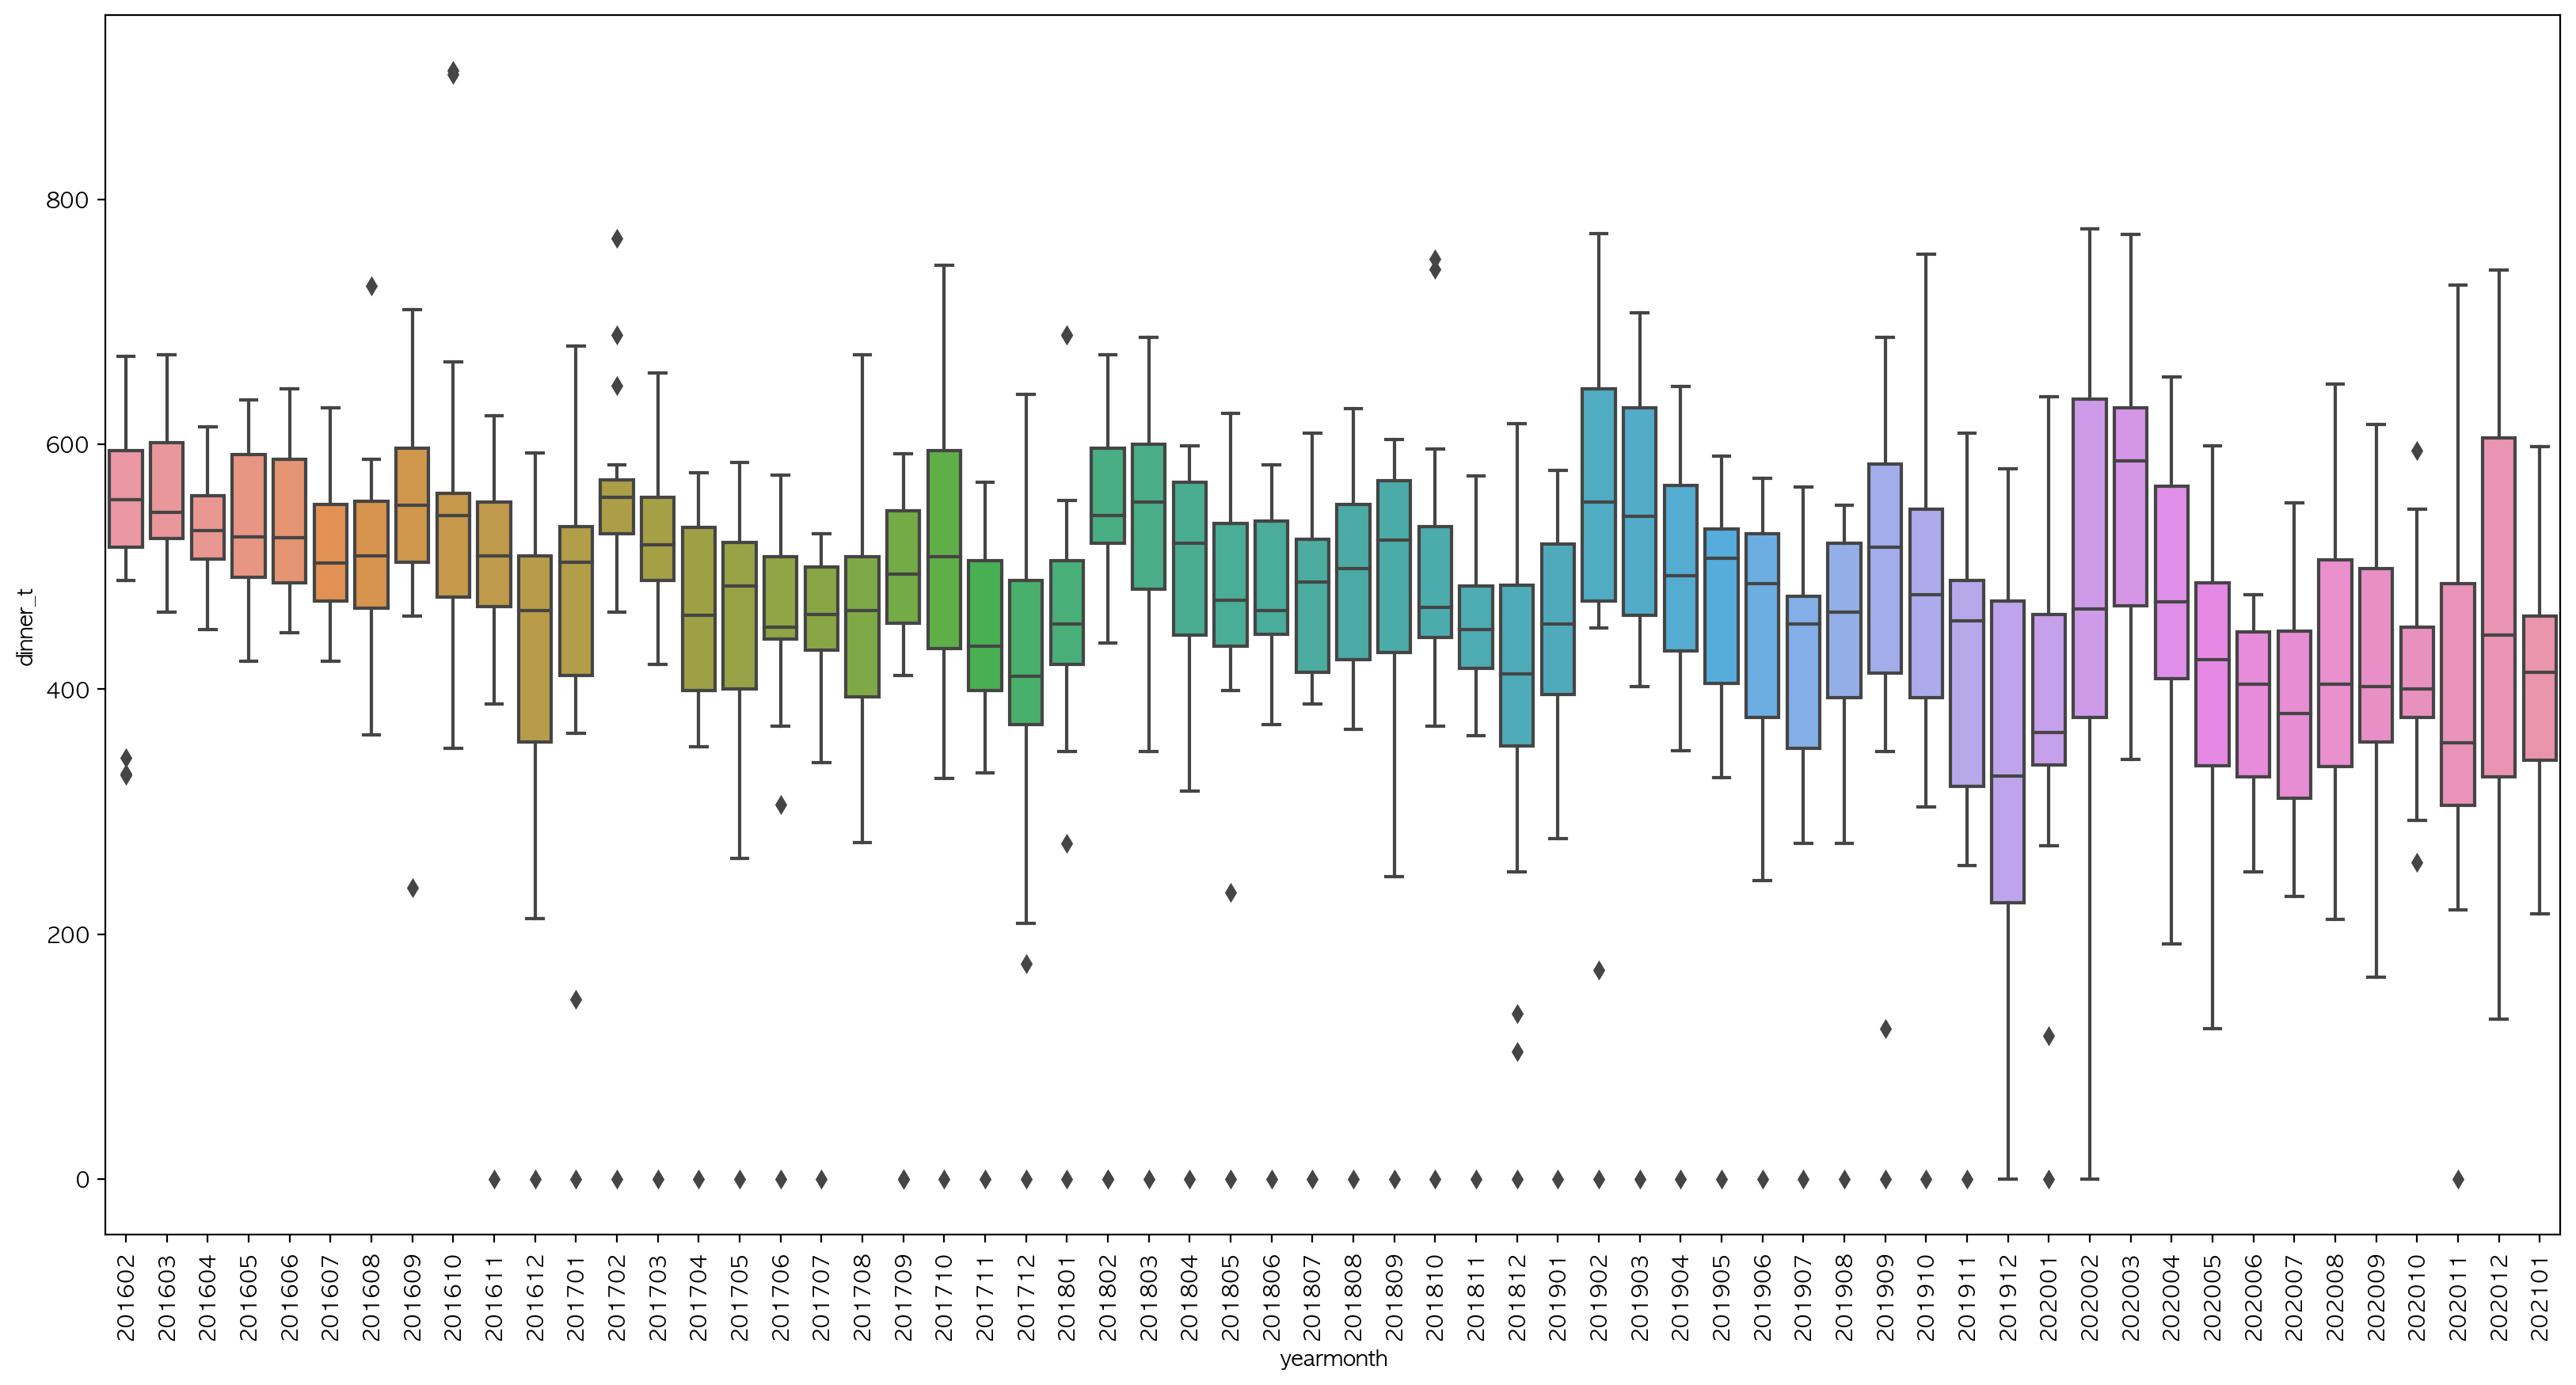

In [19]:
#월별 저녁 식수인원
plt.figure(figsize=(20, 10))
rot=sns.boxplot(x='yearmonth', y='dinner_t', data=train)

for item in rot.get_xticklabels():
    item.set_rotation(90)

In [20]:
train.drop('yearmonth', inplace=True, axis=1)

### 메뉴 분리

In [21]:
#메뉴들 나눠 주기
#일별 점심 메뉴를 작은 리스트로 갖고 있는 큰 리스트 만들기

lunch_menu = []

for day in range(len(train)):
    tmp = train.loc[day,'lunch'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp)

In [22]:
for bob in range(len(train)):
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [23]:
lunch_menu[:3]

[['밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']]

In [24]:
train['lunch_menu']=lunch_menu
train[:3]

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t,lunch_menu
0,0201,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,0202,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"
2,0203,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]"


In [25]:
lunch_menu

[['밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치'],
 ['밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절임', '요구르트', '포기김치'],
 ['밥', '꽃게탕', '돈육굴소스볶음', '옥수수전', '유채나물', '요구르트', '포기김치'],
 ['밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침', '요구르트', '포기김치'],
 ['밥', '쇠고기무국', '탕수어', '오징어숙회무침', '취나물', '요구르트', '포기김치'],
 ['밥', '냉이된장국', '쇠고기장조림', '통도라지구이', '치커리무침', '요구르트', '포기김치'],
 ['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '요구르트', '포기김치'],
 ['밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침/치킨무', '요구르트', '포기김치'],
 ['밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', '파래김*양념장', '부럼/요구르트', '포기김치'],
 ['밥', '콩나물국', '돈육간장볶음', '버섯잡채', '꽃상추무침', '요구르트', '포기김치'],
 ['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', '포기김치'],
 ['밥', '북어계란국', '닭갈비', '새싹두부구이', '곰피초장', '요구르트', '포기김치'],
 ['밥', '수제비국', '오징어볶음', '계란

In [26]:
bob=[]
soup=[]
main=[]

for i in range(len(train)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main.append(lunch_menu[i][2])
        
print(len(bob))
print(len(soup))
print(len(main))
print('---')
print(len(train))

1205
1205
1205
---
1205


In [27]:
train['bob'] = bob
train['soup'] = soup
train['main'] = main
train.head(3)

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t,lunch_menu,bob,soup,main
0,0201,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기
1,0202,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김
2,0203,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]",카레덮밥,팽이장국,치킨핑거


In [28]:
#저녁 메뉴
dinner_menu=[]
for day in range(len(train)):
    tmp = train.loc[day,'dinner'].split(' ') # 스페이스로 구분
    tmp = ' '.join(tmp).split()    # 빈칸 제거
    
    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp)

In [29]:
train['dinner_menu'] = dinner_menu
len(train['dinner_menu'])

1205

In [38]:
bobd=[]
soupd=[]
maind=[]


for word in  dinner_menu:
    
    
    if len(word) == 0:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의달' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기계발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*자기계발의날*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기개발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')

    else:
        bobd.append(word[0])
        soupd.append(word[1])
        maind.append(word[2])

In [40]:
print(len(dinner_menu))
print(len(bobd))
print(len(soupd))
print(len(maind))

1205
1205
1205
1205


In [41]:
train['bobd'] = bobd
train['soupd'] = soupd
train['maind'] = maind

In [42]:
train['maind'].value_counts()[:10]

None       41
닭갈비        16
떡볶이        16
돈육강정       15
돈육굴소스볶음    14
고추잡채*꽃빵    14
유린기        14
깐풍기        14
돈육장조림      14
주꾸미볶음      13
Name: maind, dtype: int64

In [46]:
#날짜컬럼생성
train['Month'] = train['date'].str[0:2]
train['Date'] = train['date'].str[2:]
train.drop(['date', 'break'], inplace=True, axis=1)

In [47]:
#lunch_train
df_train = train[['day', 'numbers', 'dayoff', 'work', 'outsidework', 'workfhome', 'lunch_t', 'Month', 'Date', 'bob', 'soup', 'main']]

In [48]:
#encoding
df_train['day'] = df_train['day'].astype('category')
df_train['day'] = df_train.day.cat.codes

df_train['bob'] = df_train['bob'].astype('category')
df_train['bob'] = df_train.bob.cat.codes

df_train['soup'] = df_train['soup'].astype('category')
df_train['soup'] = df_train.soup.cat.codes

df_train['main'] = df_train['main'].astype('category')
df_train['main'] = df_train.main.cat.codes

In [49]:
df_train['present'] = df_train['numbers']-df_train['dayoff']-df_train['work']-df_train['outsidework']
df_train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,Month,Date,bob,soup,main,present
0,3,2601,50,150,238,0.0,1039.0,02,01,22,189,236,2163
1,4,2601,50,173,319,0.0,867.0,02,02,22,28,8,2059
2,2,2601,56,180,111,0.0,1017.0,02,03,49,249,334,2254
3,1,2601,104,220,355,0.0,978.0,02,04,22,149,309,1922
4,0,2601,278,181,34,0.0,925.0,02,05,22,75,106,2108


### Feature Engineering

In [31]:
#수치 데이터만 피쳐값으로 선택
x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
y1_train = train['중식계']
y2_train = train['석식계']

x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

KeyError: "None of [Index(['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수'], dtype='object')] are in the [columns]"

In [ ]:
#점심 및 저녁 식수 인원 예측 모델
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model1.fit(x_train, y1_train)
model2.fit(x_train, y2_train)

In [ ]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)

In [ ]:
submission['중식계'] = pred1
submission['석식계'] = pred2

In [ ]:
submission

In [ ]:
submission.to_csv('baseline.csv', index=False)